<a href="https://colab.research.google.com/github/gouri-22/credit-risk-self-project/blob/main/EDA%2Bfeature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("default of credit card clients.csv", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [6]:
print(df.columns.tolist())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [7]:
# Feature grouping
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

#feature engineering
df['avg_delay'] = df[pay_cols].replace(-2, 0).mean(axis=1)
df['avg_bill'] = df[bill_cols].mean(axis=1)
df['avg_pay'] = df[pay_amt_cols].mean(axis=1)
df['pay_ratio'] = df['avg_pay'] / (df['avg_bill'] + 1)
df['pay_consistency'] = df[pay_amt_cols].std(axis=1)

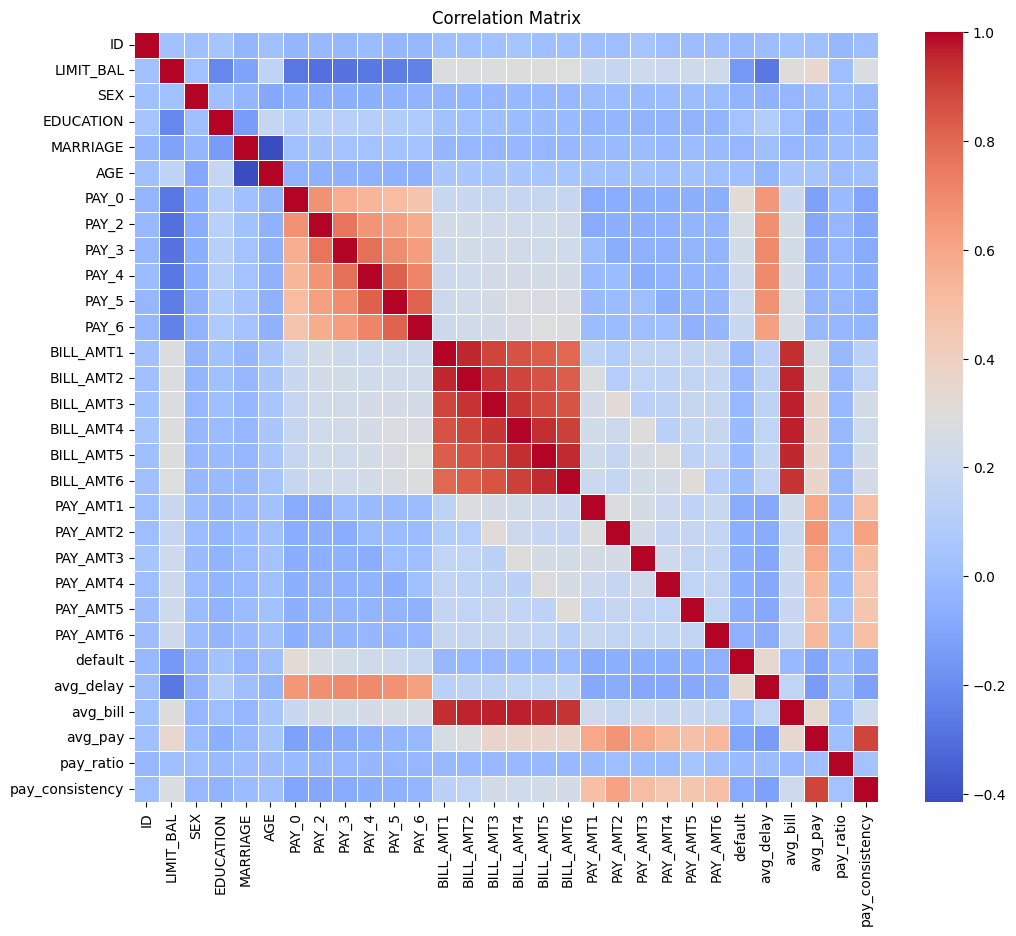

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

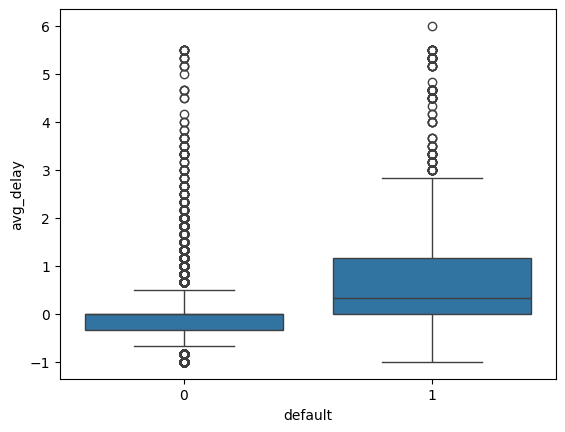

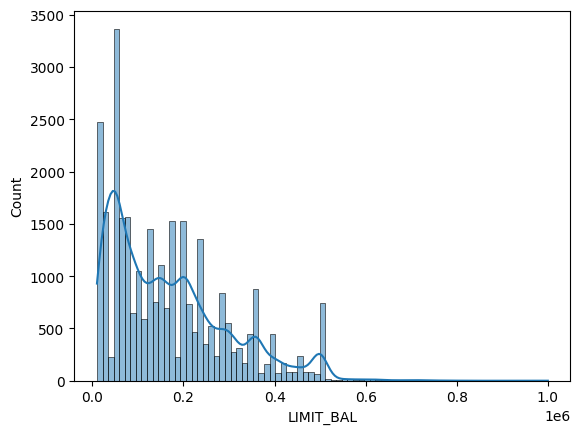

In [9]:
sns.boxplot(x='default', y='avg_delay', data=df)
plt.show()

sns.histplot(df['LIMIT_BAL'], kde=True)
plt.show()

In [10]:
#feature subsets
X_static = df[['LIMIT_BAL', 'AGE', 'avg_delay', 'avg_bill', 'avg_pay', 'pay_ratio', 'pay_consistency']]
X_pca_input = df[pay_cols + bill_cols + pay_amt_cols]
X_seq = df[bill_cols + pay_amt_cols]
y = df['default']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_static, y, test_size=0.2, random_state=42)

In [13]:
X_static.to_csv("X_static.csv", index=False)
X_pca_input.to_csv("X_pca_input.csv", index=False)
X_seq.to_csv("X_seq.csv", index=False)
y.to_csv("y.csv", index=False)